# Анализ результатов опроса "Удовлетворённость уровнем образования студентов БГУИР"

Не так давно мы провели [опрос](https://vk.com/imagine_ai?w=wall-176000119_17), основной целью которого было узнать, что студенты БГУИР думают о своём университете и том образовании, которое получают. Всего за неделю  в опросе приняли участие около 850 человек, форма распространялась через bsuir-related беседы и сообщества, а участие, само собой, было анонимным и добровольным.  


Несмотря на  попытки сохранить баланс между детальностью вопросов и загруженностью, а также достичь максимально возможной репрезентативности выборки, такой метод сбора информации не застрахован от ошибок и неточностей. Здесь мы не будем заниматься интерпретацией результатов, пытаться установить причинно-следственные связи и делать какие-либо выводы, а лишь проведём первичную обработку и анализ полученных данных.

## Загрузка и предобработка данных

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
def format_func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

In [3]:
data = pd.read_csv('responses.csv')

In [4]:
print("{} человек приняли участие в опросе".format(data.shape[0]))

847 человек приняли участие в опросе


In [5]:
mlb = MultiLabelBinarizer()

lab_columns_data = mlb.fit_transform(
    data['Если сдаёте чужие работы, то почему?'].fillna("Не сдаю чужие работы").apply(lambda x: x.split(', ')))
lab_columns_names = mlb.classes_

data = data.join(pd.DataFrame(lab_columns_data, columns=lab_columns_names))

study_columns_data = mlb.fit_transform(
    data['Почему вы учитесь в БГУИРе?'].apply(lambda x: x.split(', ')))
study_columns_names = mlb.classes_

data = data.join(pd.DataFrame(study_columns_data, columns=study_columns_names))

In [6]:
for column in study_columns_names:
    data[column] = data[column].apply(lambda x: "Да" if x else "Нет")

In [7]:
for column in lab_columns_names:
    data[column] = data[column].apply(lambda x: "Да" if x else "Нет")

In [8]:
data.head(n=5).T

,0,1,2,3,4
Ваш курс,2,1,2,2,1
Ваш факультет,ФКП,ФРЭ,ИЭФ,ФИТУ,ФИТУ
Ваша форма обучения,Бюджетная,Бюджетная,Платная,Бюджетная,Бюджетная
Ваш пол,Мужской,Мужской,Женский,Женский,Женский
"Поступили ли вы туда, куда сами хотели?","Университет - да, специальность - нет",Нет,Затрудняюсь ответить,"Да, и университет, и специальность","Университет - да, специальность - нет"
Имеется ли у вас интерес к профессии?,Нет,"Был до поступления, но пропал",Да,Да,Нет
Работаете ли вы по профессии?,Нет,Нет,Нет,Нет,Нет
Почему вы учитесь в БГУИРе?,Нужен диплом,"Нужен диплом, Отсрочка от армии",Друзья/знакомые/мнение родителей,Считаю БГУИР хорошим местом для получения знан...,Считаю БГУИР хорошим местом для получения знаний
Посещаете ли вы лекции?,"Да, но только то, что интересно","Да, стараюсь посещать по возможности все","Да, но только то, что интересно",Практически не посещаю,"Да, стараюсь посещать по возможности все"
Ощущаете ли вы нехватку возможности выбирать интересующие вас предметы для изучения?,Да,Нет,Да,Нет,Да


## Общие статистики

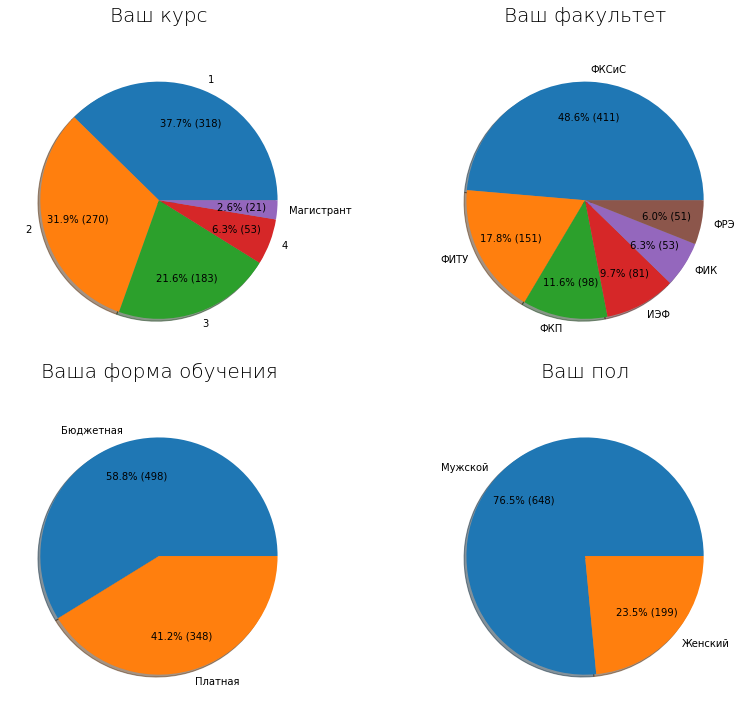

In [9]:
questions = ['Ваш курс', 'Ваш факультет', 'Ваша форма обучения', 'Ваш пол']

plt.figure(figsize=(14,12))

for i, question in enumerate(questions):
    
    plt.subplot(2, 2, i + 1)
    
    target = data[question].value_counts()
    labels = target.index.values
    plt.title(question, loc = 'center', fontdict={'fontsize': 20, 'fontweight': 'light'}, pad=30)
    plt.pie(target, labels=labels, autopct=lambda pct: format_func(pct, target),
            shadow=True, startangle=0, textprops=dict(color="black"), pctdistance=0.7)
    
plt.show()

## Ответы на остальные вопросы

Меняя question и сriterion внизу, можно получить ответы на большинство вопросов. Чуть-чуть дописав, можно узнать что угодно

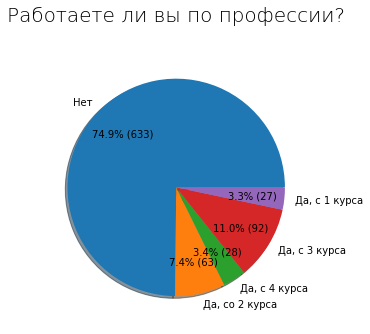

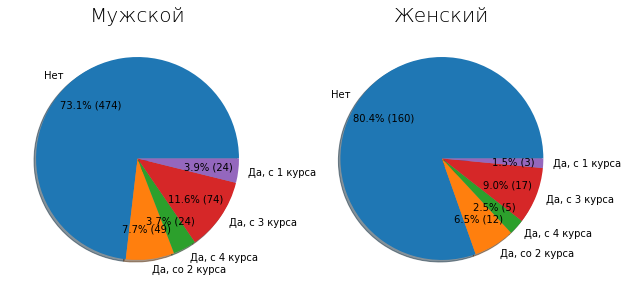

In [89]:
question = 'Работаете ли вы по профессии?'

index = data[question].unique()

plt.figure(figsize=(5, 5))

target = data[question].value_counts().reindex(index=index)
labels = target.index.values

plt.title(question, loc = 'center', fontdict={'fontsize': 20, 'fontweight': 'light'}, pad=30)
plt.pie(target, labels=labels, autopct=lambda pct: format_func(pct, target),
        shadow=True, startangle=0, textprops=dict(color="black"), pctdistance=0.7)

plt.show()

criterion = 'Ваш пол'
titles = data[criterion].value_counts().index.values
grouped_data = data.groupby(criterion)[question].value_counts()

plt.figure(figsize=(10, 20))

for i, title in enumerate(titles):
    
    plt.subplot(3, 2, i + 1)
    
    target = grouped_data[title].reindex(index=index)
    plt.title(title, loc = 'center', fontdict={'fontsize': 20, 'fontweight': 'light'}, pad=10)
    plt.pie(target, labels=index, autopct=lambda pct: format_func(pct, target),
            shadow=True, startangle=0, textprops=dict(color="black"), pctdistance=0.7)
    

plt.show()

## Почему вы учитесь в БГУИР?

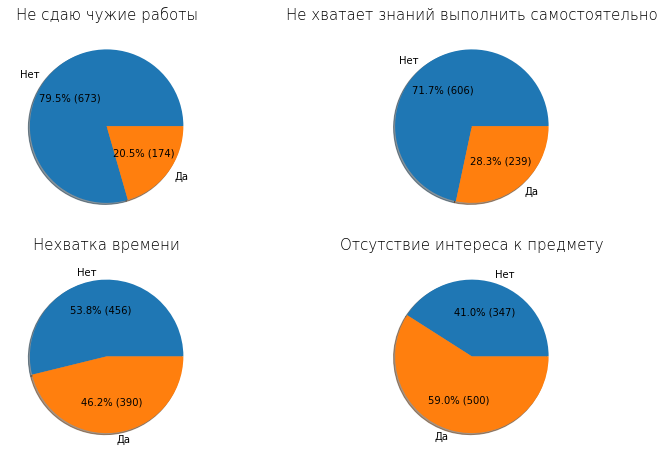

In [62]:
plt.figure(figsize=(12,12))

for i, reason in enumerate(lab_columns_names):
    
    plt.subplot(3, 2, i + 1)
    index = ['Нет', 'Да']
    target = data[reason].value_counts().reindex(index=index)
    plt.title(reason, loc = 'center', fontdict={'fontsize': 15, 'fontweight': 'light'}, pad=10)
    plt.pie(target, labels=index, autopct=lambda pct: format_func(pct, target),
            shadow=True, startangle=0, textprops=dict(color="black"), pctdistance=0.6)
    
plt.show()

## Отзывы студентов

In [15]:
for i, review in enumerate(data['И напоследок: опишите БГУИР парой слов или одним предложением']):
    print(i, review)

0 Шарага, но не такая шарага как другие вузы РБ
1 ...
2 Требует инноваций, как и все в этой стране
3 Универ как универ
4 БГУИР - знания и стиль жизни
5 -
6 Лучший IT-вуз страны
7 Лучше чем другиес вузы в РБ
8 К!
9 Вуз, который, кажется, пытается следовать трендам, но получается у него это с переменным успехом.
10 Программистам лучше на РАФ
11 Взлом жопы
12 Тупое говно тупого говна
13 Самый обычный вуз, с теми же проблемами, что и в любом другом в нашей стране. Но: лабораторные работы (имеются в виду занятия, отведенное на них ОГРОМНОЕ количество времени) БЕСПОЛЕЗНЫ. С тем, как они проходят, лучше выделить время с них на более углубленные лекции и сделать лекции ОБЯЗАТЕЛЬНЫМИ для посещения, а на лабы дать 2 занятия в семестре: 1ое, чтобы выдать говно которое надо сдать, 2ое - чтобы прийти и сдать это говно. Все равно, никто качественно ничего не проверяет и какой-либо помощи не предложит по этим лабам.
14 нормально, но можно лучше 
15 Не самое дурное место
16 ни о чем
17 Не знаю 
18 Мес

In [16]:
for i,comment in enumerate(data['Хотите ещё что-нибудь добавить?'].dropna()):
    print(i, comment)

0 Нет.
1 Хорошо подобраны варианты ответов. Я понимаю, как разграничить области для них. 
2 Не все предметы интересны. Есть крутые преподователи, которые суперски объясняют. Есть преподы, к которым ходить не хочеться, потому что все объяснение материала сводится к прочтению с листка либо с монитора.
3 да просто надо менять ВСЁ
4 Глядя на большинство преподавателей возникает чувство, что им плевать и на предмет, и на студентов. Практически не осталось тех, кто действительно может и хочет чему-то научить. Более того, тех, кто действительно способен заинтересовать в предмете и вдохновить на изучение (да, это важно) практически нет. Полностью отсутствует свобода выбора предметов, студентов пикчают тем, что им не интересно, и в результате получаем нулевой КПД от такого образования. 
5 Нет
6 Нет
7 Держится на преподавателях типа Надольского 
8 Нет.
9 Хотелось бы учить предметы по направлению "программирование" на более реальных условиях. Т.е. задачи, которые встречаются в реальной работе, мо

## The end :)